In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
import matplotlib.dates as mdates

In [3]:
dfxgboost= pd.read_csv('xgboost_results_dump.csv')
dfarima = pd.read_csv('arima_results_dump.csv')
#print(dfarima.head())
#print(dfxgboost.head())

In [4]:
dfxgboost.rename(columns={'Unnamed: 0':'date'},inplace = True)
dfarima.rename(columns={'Unnamed: 0':'date'},inplace = True)
dfsor = pd.merge(dfxgboost, dfarima, on = 'date', suffixes = ('_xgboost','_arima'))
dfsor['date'] = pd.to_datetime(dfsor['date'])
#print(dfsor.head())

In [5]:
if dfsor['y_train_xgboost'].equals(dfsor['y_train_arima']):
    dfsor.drop(columns=['y_train_arima'], inplace=True)
    dfsor.rename(columns={'y_train_xgboost': 'y_train'}, inplace=True)
print(dfsor.head())                                              

        date  y_train  y_train_pred_xgboost  y_dev_xgboost   
0 2015-01-01    135.0             136.21098            NaN  \
1 2015-01-02    187.0             184.00029            NaN   
2 2015-01-03    139.0             135.74527            NaN   
3 2015-01-04    141.0             134.56624            NaN   
4 2015-01-05    147.0             152.90903            NaN   

   y_dev_pred_xgboost  y_test_xgboost  y_test_pred_xgboost   
0                 NaN             NaN                  NaN  \
1                 NaN             NaN                  NaN   
2                 NaN             NaN                  NaN   
3                 NaN             NaN                  NaN   
4                 NaN             NaN                  NaN   

   y_train_pred_arima  y_dev_arima  y_dev_pred_arima  y_test_arima   
0          134.517581          NaN               NaN           NaN  \
1          134.936020          NaN               NaN           NaN   
2          156.980025          NaN          

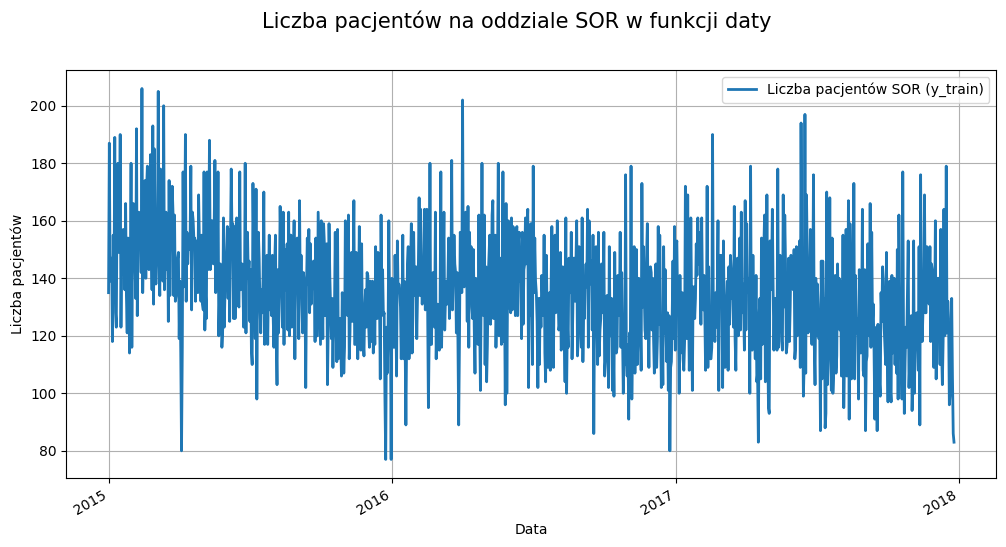

In [6]:
y_values = dfsor['y_train'].dropna()
dates = dfsor['date'][y_values.index]

date_locator = mdates.YearLocator(1)
date_formatter = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(dates, y_values, lw=2, label="Liczba pacjentów SOR (y_train)")
ax.xaxis.set_major_locator(date_locator)
ax.xaxis.set_major_formatter(date_formatter)
ax.set_ylabel("Liczba pacjentów")
ax.set_xlabel("Data")
ax.legend()
ax.grid(True)


fig.suptitle("Liczba pacjentów na oddziale SOR w funkcji daty", fontsize=15)
fig.autofmt_xdate()
#plt.show()

In [7]:
def plotMonthCounts(months, years, columns):
    filtered_data = dfsor[dfsor['date'].dt.month.isin(months)]
    filtered_data = filtered_data[filtered_data['date'].dt.year.isin(years)]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for column in columns:
        combined_data = []
        for year in years:
            data_for_year = filtered_data[filtered_data['date'].dt.year == year]
            combined_data.append(data_for_year[['date', column]])
        
        combined_data = pd.concat(combined_data)
        ax.plot(combined_data['date'], combined_data[column], lw=2, label=f"{column}")

    first_mondays = mdates.WeekdayLocator(byweekday=mdates.MONDAY, interval=4)  
    ax.xaxis.set_major_locator(first_mondays)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))

    ax.set_xlabel("Data")
    ax.set_ylabel("Liczba pacjentów")
    
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(dict.fromkeys(labels))  
    ax.legend(handles[:len(columns)], unique_labels, title="Model")

    ax.grid(True)
    
    fig.suptitle(f"Liczba pacjentów w miesiącach {months} roku {years} dla modeli/u {columns}", fontsize=15)
    fig.autofmt_xdate()
    plt.show()


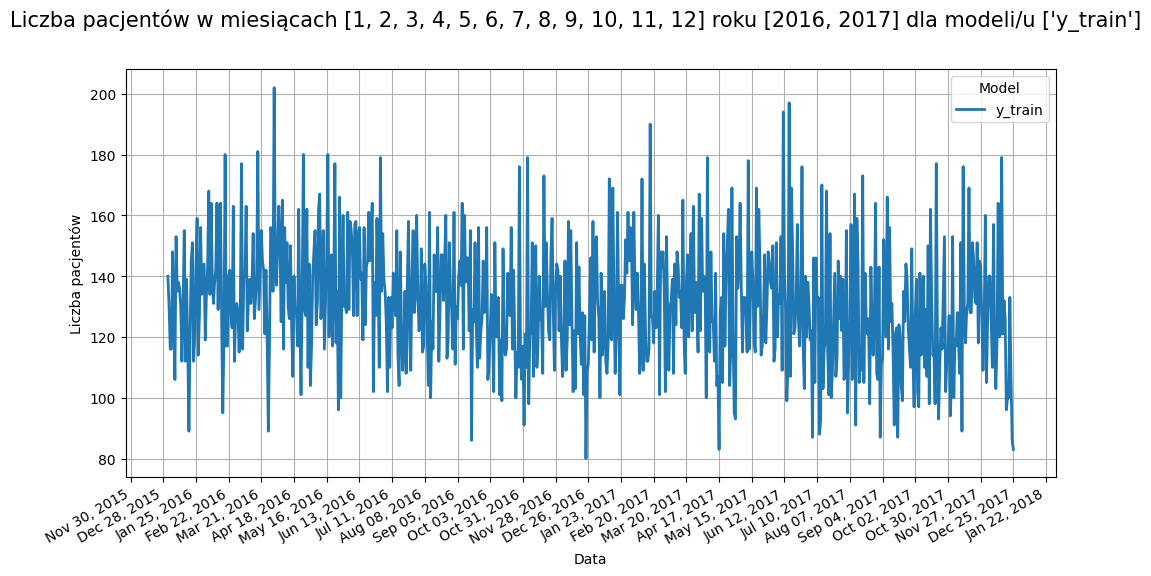

In [8]:
plotMonthCounts(months=list(range(1, 13)), years=[2016, 2017], columns=["y_train"])

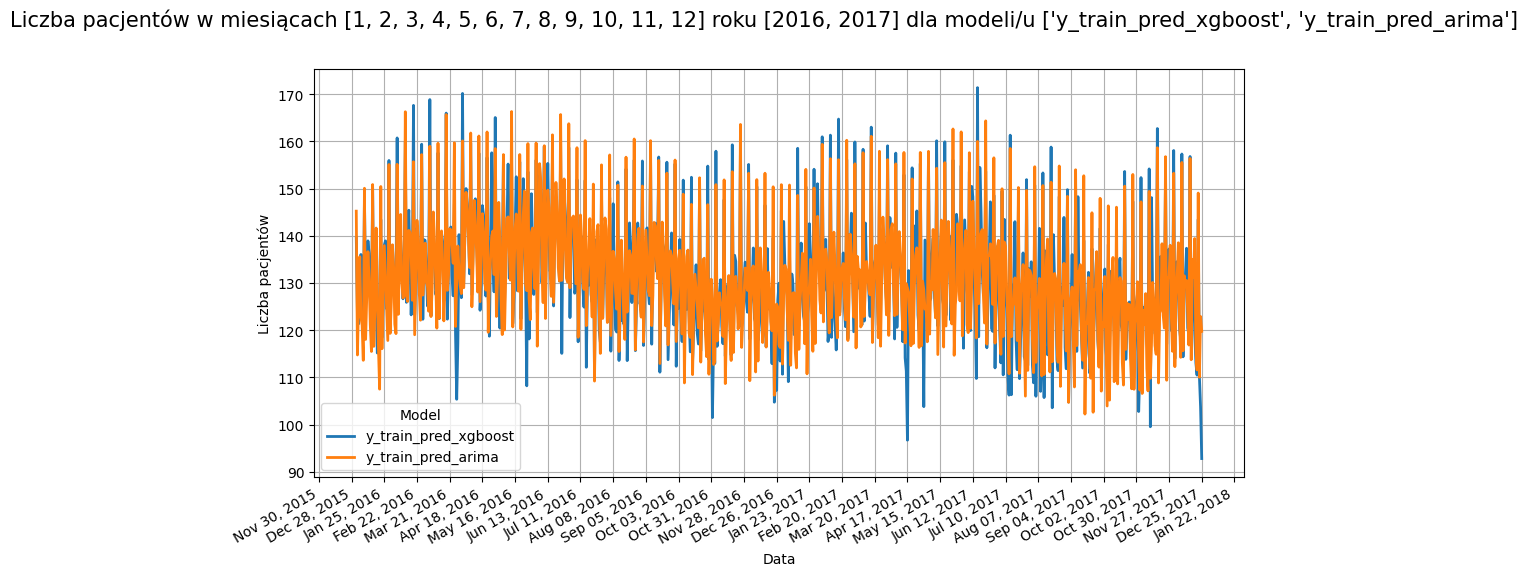

In [9]:
plotMonthCounts(months=list(range(1, 13)), years=[2016, 2017], columns=["y_train_pred_xgboost", "y_train_pred_arima"])

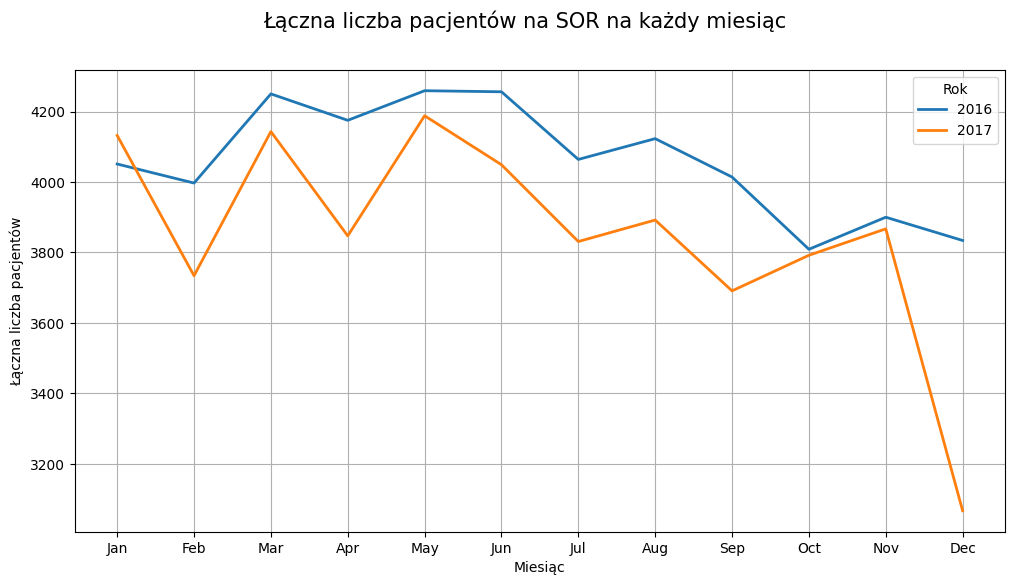

In [14]:
def plotTotalPatientsPerMonth(months, years, column, title="Łączna liczba pacjentów na SOR na każdy miesiąc"):
    filtered_data = dfsor[dfsor['date'].dt.month.isin(months)]
    filtered_data = filtered_data[filtered_data['date'].dt.year.isin(years)]
    
    monthly_totals = filtered_data.groupby(
        [filtered_data['date'].dt.year.rename('year'), 
         filtered_data['date'].dt.month.rename('month')]
    )[column].sum().reset_index()
    
    monthly_totals.rename(columns={column: 'total_patients'}, inplace=True)

    fig, ax = plt.subplots(figsize=(12, 6))
    
    for year in years:
        data_for_year = monthly_totals[monthly_totals['year'] == year]
        ax.plot(data_for_year['month'], data_for_year['total_patients'], lw=2, label=f"{year}")
        
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    ax.set_xlabel("Miesiąc")
    ax.set_ylabel("Łączna liczba pacjentów")
    ax.legend(title="Rok")
    ax.grid(True)
    fig.suptitle(title, fontsize=15)
    
    plt.show()

plotTotalPatientsPerMonth(months=list(range(1, 13)), years=[2016, 2017], column="y_train")